Importing the necessary python libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Gold Stock data and cleaning it:

In [205]:
gold_stock_data = pd.read_csv('stock_gold.csv')
# gold_stock_data.head()
# gold_stock_data.columns # All columns don't have extra spaces
# gold_stock_data.info()  # Year is of type int and others are of type object
gold_stock_data['Year'] = pd.to_datetime(gold_stock_data['Year'], format='%Y').dt.year
cols = gold_stock_data.columns[1:]  # slicing to get columns except Year
for i in cols:
    gold_stock_data[i] = gold_stock_data[i].str.replace(',', '').astype(float)
# gold_stock_data.info()

# Loading this into data frame
stock_gold_df = pd.DataFrame(gold_stock_data)
# Taking data only after year 2015
stock_gold_df = stock_gold_df[stock_gold_df['Year'] >= 2015]
stock_gold_df.head()

,Year,Jewellery,Central banks,Private Investment,Bars & Coins,ETFs,Other,Total
5,2015,89409.4,31839.3,37242.9,35655.0,1587.9,25453.8,183945.4
6,2016,90196.1,32234.1,38859.1,36728.1,2131.0,26208.9,187498.2
7,2017,91341.1,32612.7,40174.1,37772.4,2401.7,26920.5,191048.4
8,2018,92499.5,33268.9,41335.0,38863.0,2472.0,27589.3,194692.7
9,2019,93375.9,33874.3,42609.7,39734.1,2875.6,28435.4,198295.2


Now loading the data of Dow, SPX and Silver

In [206]:
# Dow Jones:
dow_data = pd.read_csv('dow_jones.csv')
# dow_data.columns    # Empty spaces in column names
dow_data.columns = dow_data.columns.str.strip()
# dow_data.columns
# dow_data.info() # Date column is dtype object
dow_data['Date'] = pd.to_datetime(dow_data['Date'], format='mixed')
dow_data.set_index('Date', inplace=True)
dow_data = dow_data.resample('YE').last()   # resampling to year end data only
dow_data.reset_index(inplace=True)
dow_data['Date'] = dow_data['Date'].dt.year
# Assigning the data into Data Frame
dow_df = pd.DataFrame(dow_data)
dow_df['Index'] = 'Dow_Jones'
dow_df['Percent Change'] = dow_df['Close'].pct_change()*100
dow_df['Percent Change'] = dow_df['Percent Change'].fillna(0)
dow_df.head()

,Date,Open,High,Low,Close,Index,Percent Change
0,2015,17590.66,17590.66,17421.16,17425.03,Dow_Jones,0.000000
1,2016,19833.17,19852.55,19718.67,19762.60,Dow_Jones,13.415013
2,2017,24849.63,24871.66,24719.22,24719.22,Dow_Jones,25.080809
3,2018,23153.94,23333.18,23118.30,23327.46,Dow_Jones,-5.630275
4,2019,28414.64,28547.35,28376.49,28538.44,Dow_Jones,22.338394


In [207]:
# S&P 500:
snp_data = pd.read_csv('spx.csv')
# snp_data.columns    # Again extra spaces in column names
snp_data.columns = snp_data.columns.str.strip()
# snp_data.info() # Date is of type object again
snp_data['Date'] = pd.to_datetime(snp_data['Date'], format='mixed')
snp_data.set_index('Date', inplace=True)
snp_data = snp_data.resample('YE').last()   # Resampling data to end of year data only
snp_data.reset_index(inplace=True)
snp_data['Date'] = snp_data['Date'].dt.year
# Assigning the data into Data Frame
snp_df = pd.DataFrame(snp_data)
snp_df['Index'] = 'S&P_500'
snp_df['Percent Change'] = snp_df['Close'].pct_change()*100
snp_df['Percent Change'] = snp_df['Percent Change'].fillna(0)
snp_df.head()

,Date,Open,High,Low,Close,Index,Percent Change
0,2015,2060.59,2062.54,2043.62,2043.94,S&P_500,0.000000
1,2016,2251.61,2253.58,2233.62,2238.83,S&P_500,9.535016
2,2017,2689.15,2692.12,2673.61,2673.61,S&P_500,19.419965
3,2018,2498.94,2509.24,2482.82,2506.85,S&P_500,-6.237260
4,2019,3215.18,3231.72,3212.03,3230.78,S&P_500,28.878074


In [208]:
# Gold Prices:
gold_price_data = pd.read_csv('gold_prices.csv')
# gold_price_data.columns # Column names are ok here just Close/Last => Close
# gold_price_data.info()  # Date is of type object here
gold_price_data['Date'] = pd.to_datetime(gold_price_data['Date'], format='mixed')
gold_price_data.set_index('Date', inplace=True)
gold_price_data = gold_price_data.resample('YE').last()
gold_price_data.reset_index(inplace=True)
gold_price_data['Date'] = gold_price_data['Date'].dt.year
gold_price_data = gold_price_data.rename(columns={'Close/Last': 'Close'})
gold_price_data = gold_price_data[gold_price_data['Date'] >= 2015]
# Assigning data into Data Frame
price_gold_df = pd.DataFrame(gold_price_data)
price_gold_df['Index'] = 'Gold'
price_gold_df['Percent Change'] = price_gold_df['Close'].pct_change()*100
price_gold_df['Percent Change'] = price_gold_df['Percent Change'].fillna(0)
price_gold_df.head()

,Date,Close,Volume,Open,High,Low,Index,Percent Change
1,2015,1060.2,53272.0,1060.6,1062.7,1056.5,Gold,0.000000
2,2016,1151.7,138673.0,1159.5,1164.3,1150.3,Gold,8.630447
3,2017,1309.3,226714.0,1297.5,1309.8,1296.1,Gold,13.684119
4,2018,1281.3,108913.0,1283.0,1286.5,1279.7,Gold,-2.138547
5,2019,1519.5,301.0,1513.8,1523.4,1513.8,Gold,18.590494


In [209]:
# Silver Prices:
silver_price_data = pd.read_csv('silver_prices.csv')
# silver_price_data.columns   #Just change the column name Close/Last to Close
silver_price_data = silver_price_data.rename(columns={'Close/Last': 'Close'})
# silver_price_data.info()    # Date is of type object here
silver_price_data['Date'] = pd.to_datetime(silver_price_data['Date'], format='mixed')
silver_price_data.set_index('Date', inplace=True)
silver_price_data = silver_price_data.resample('YE').last()
silver_price_data.reset_index(inplace=True)
silver_price_data = silver_price_data[silver_price_data['Date'].dt.year >= 2015]
silver_price_data['Date'] = silver_price_data['Date'].dt.year
# Assigning data into the Data Frame
price_silver_df = pd.DataFrame(silver_price_data)
price_silver_df['Index'] = 'Silver'
price_silver_df['Percent Change'] = price_silver_df['Close'].pct_change()*100
price_silver_df['Percent Change'] = price_silver_df['Percent Change'].fillna(0)
price_silver_df.head(20)

,Date,Close,Volume,Open,High,Low,Index,Percent Change
1,2015,13.803,16809.0,13.865,13.960,13.765,Silver,0.000000
2,2016,15.989,43311.0,16.225,16.345,15.880,Silver,15.837137
3,2017,17.145,69874.0,16.905,17.175,16.865,Silver,7.229971
4,2018,15.540,49552.0,15.460,15.575,15.390,Silver,-9.361330
5,2019,17.828,232.0,18.065,18.065,17.800,Silver,14.723295
6,2020,26.412,38811.0,26.835,26.880,26.345,Silver,48.148979
7,2021,23.352,28585.0,23.095,23.390,23.070,Silver,-11.585643
8,2022,24.040,39624.0,24.105,24.360,23.705,Silver,2.946214
9,2023,24.086,45455.0,24.225,24.235,23.760,Silver,0.191348
10,2024,29.564,70488.0,29.530,29.760,28.985,Silver,22.743502


Now combining the Prices Data Frames to plot the graph

In [210]:
combined_df = pd.concat([dow_df, snp_df, price_silver_df, price_gold_df])
combined_df.drop('Volume', axis=1, inplace=True)    # Dropping Volume as it is giving NaN values
combined_df.head()

,Date,Open,High,Low,Close,Index,Percent Change
0,2015,17590.66,17590.66,17421.16,17425.03,Dow_Jones,0.000000
1,2016,19833.17,19852.55,19718.67,19762.60,Dow_Jones,13.415013
2,2017,24849.63,24871.66,24719.22,24719.22,Dow_Jones,25.080809
3,2018,23153.94,23333.18,23118.30,23327.46,Dow_Jones,-5.630275
4,2019,28414.64,28547.35,28376.49,28538.44,Dow_Jones,22.338394


Plotting the graph

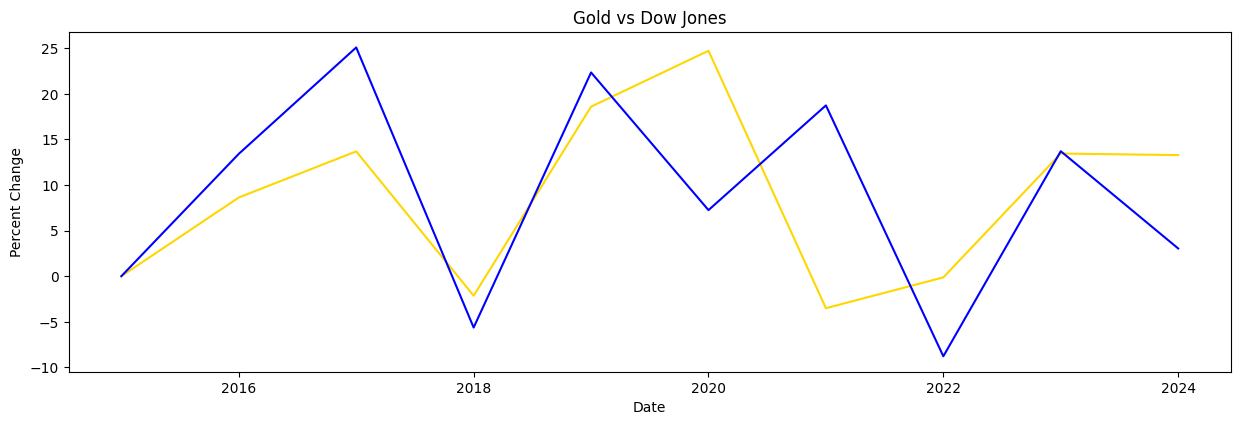

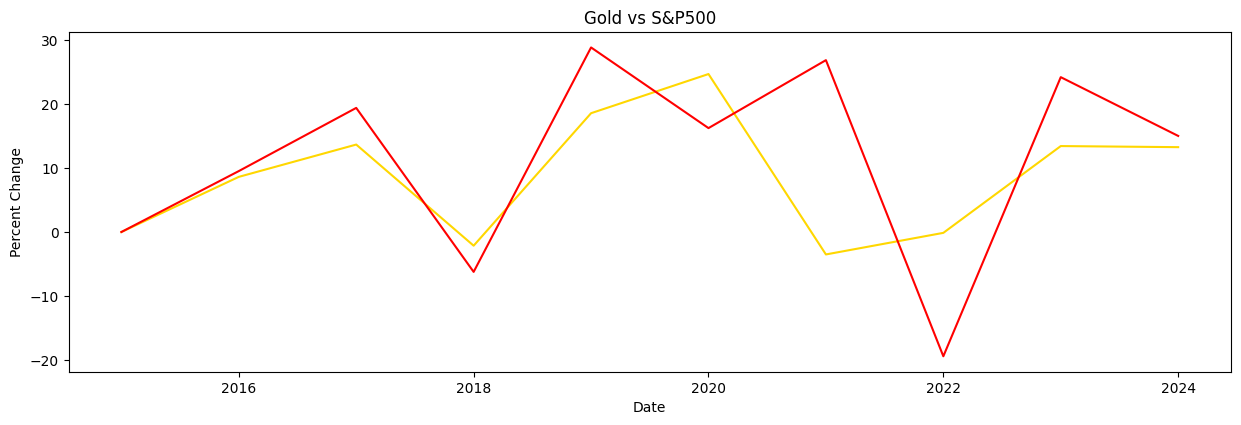

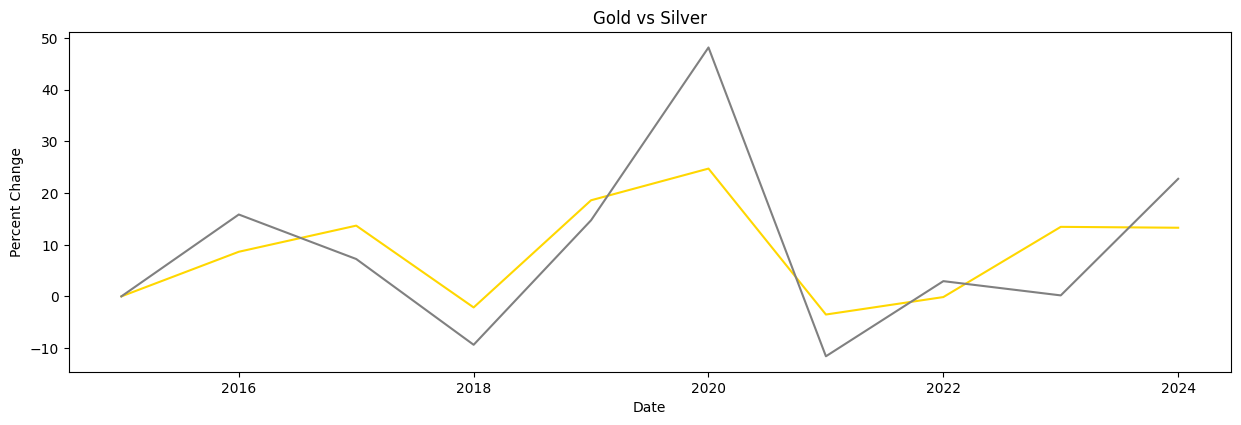

In [211]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.lineplot(data=price_gold_df, y='Percent Change', x='Date', color='gold')
sns.lineplot(data=dow_df, x='Date', y='Percent Change', color='blue')
plt.title('Gold vs Dow Jones')
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(3,1,2)
sns.lineplot(data=price_gold_df, y='Percent Change', x='Date', color='gold')
sns.lineplot(data=snp_df, x='Date', y='Percent Change', color='red')
plt.title('Gold vs S&P500')
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(3,1,2)
sns.lineplot(data=price_gold_df, y='Percent Change', x='Date', color='gold')
sns.lineplot(data=price_silver_df, x='Date', y='Percent Change', color='grey')
plt.title('Gold vs Silver')
plt.show()

Plotting a Pie Chart of Gold stock in various instruments like ETF, gold bar/coins etc.